## 05. Simple Linear Regression

In [1]:
/* Import dataset */
proc import 
    datafile='/home/u43674369/projects/project01/placement_data.csv' 
    out=df dbms=csv replace;
run;

/* Replace missing values with 0 */
proc stdize data=df
    out=df
    reponly missing=0;
run;

Error trying to read authinfo file:C:\Users\james\_authinfo
[Errno 2] No such file or directory: 'C:\\Users\\james\\_authinfo'
Did not find key oda in authinfo file:C:\Users\james\_authinfo

Please enter the IOM user id: james.ssjeong@gmail.com
Please enter the password for IOM user : ········
SAS Connection established. Subprocess id is 11220

7                                                          The SAS System                      Sunday, November  1, 2020 04:46:00 PM

34         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
34       ! ods graphics on / outputfmt=png;
35         
36         /* Import dataset */
37         proc import
38             datafile='/home/u43674369/projects/project01/placement_data.csv'
39             out=df dbms=csv replace;
40         run;
NOTE: Unable to open parameter catalog: SASUSER.PARMS.PARMS.SLIST in update mode. Temporary parameter values will be saved to 
WORK.PARMS.PAR


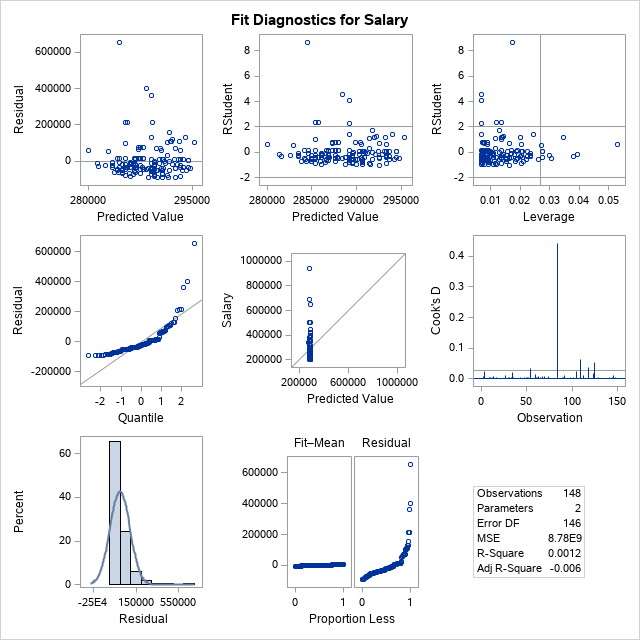
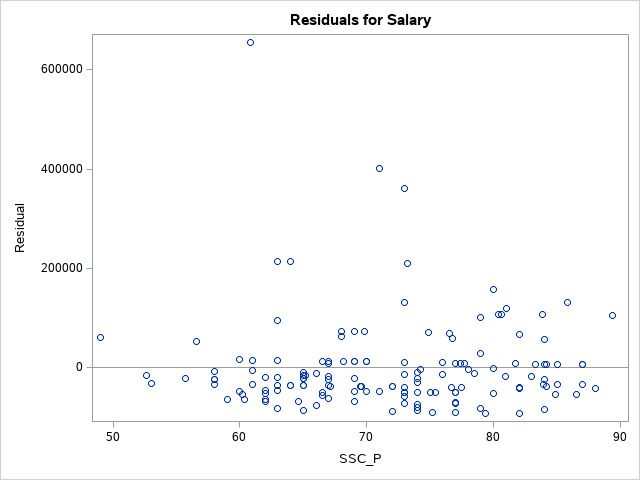
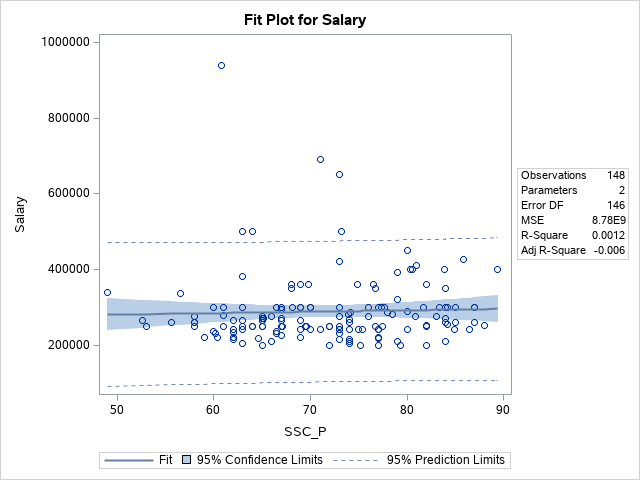
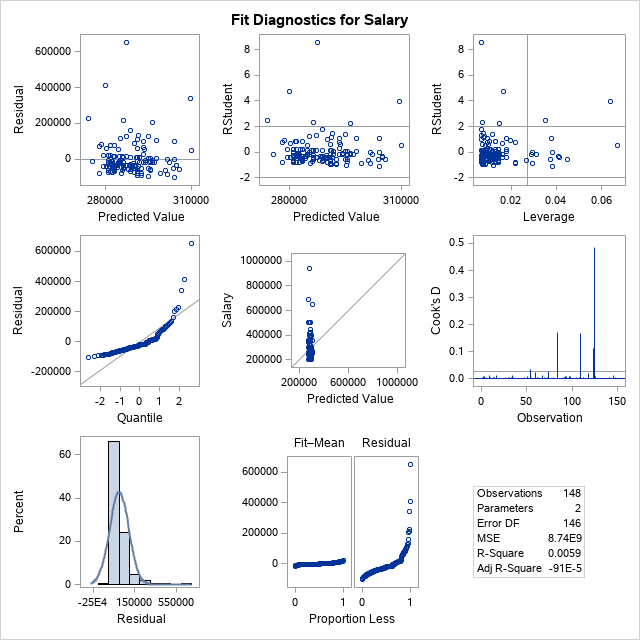
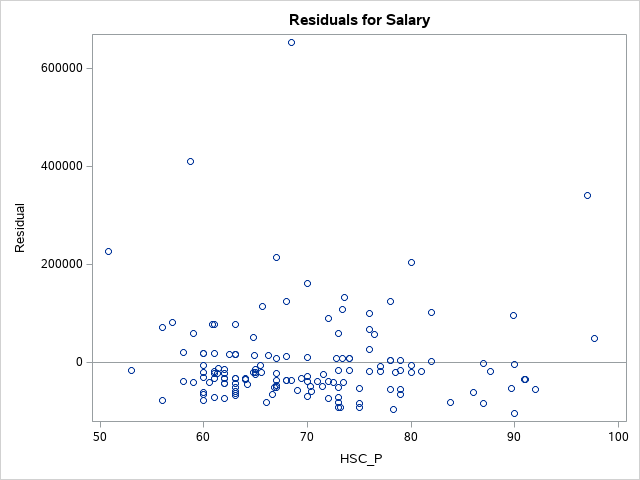
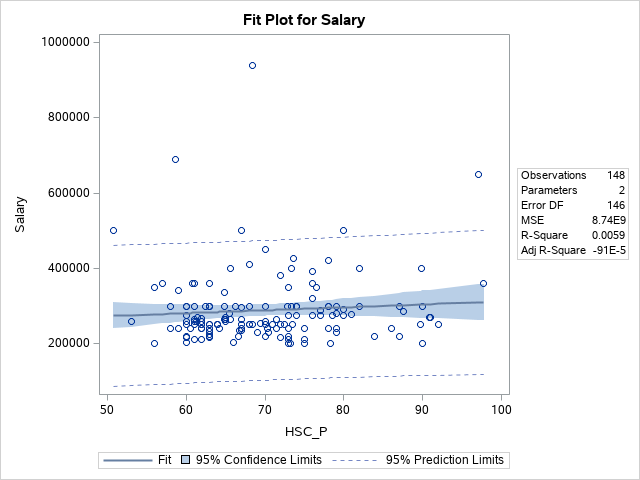
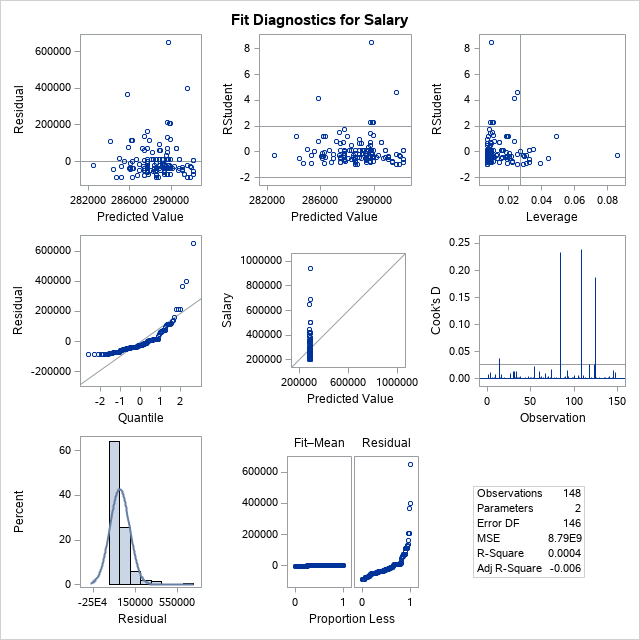
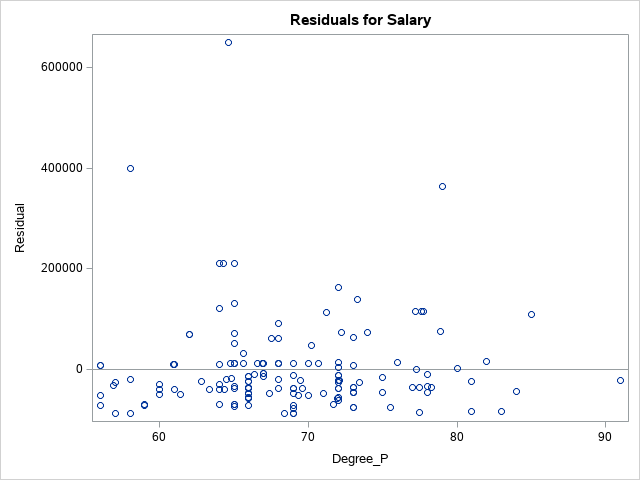
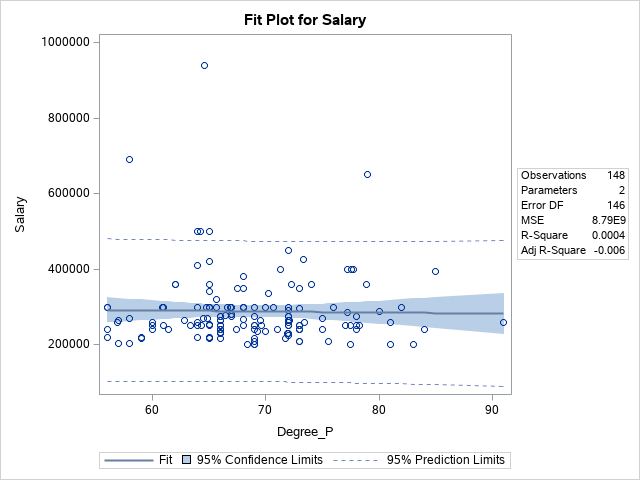
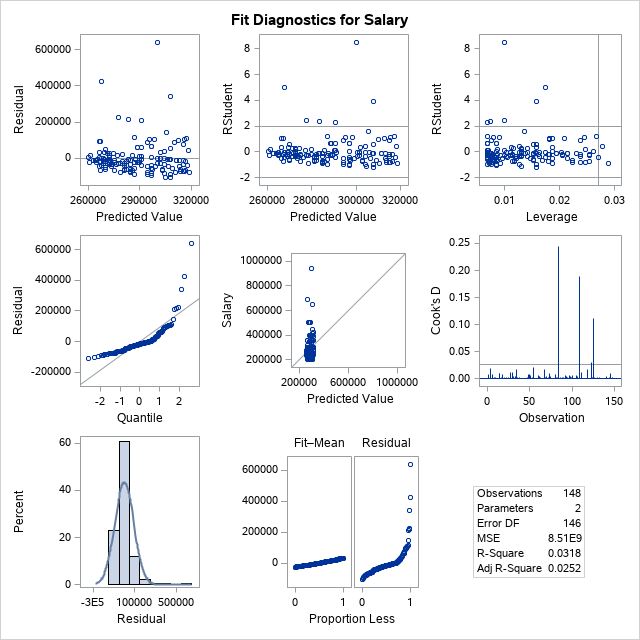
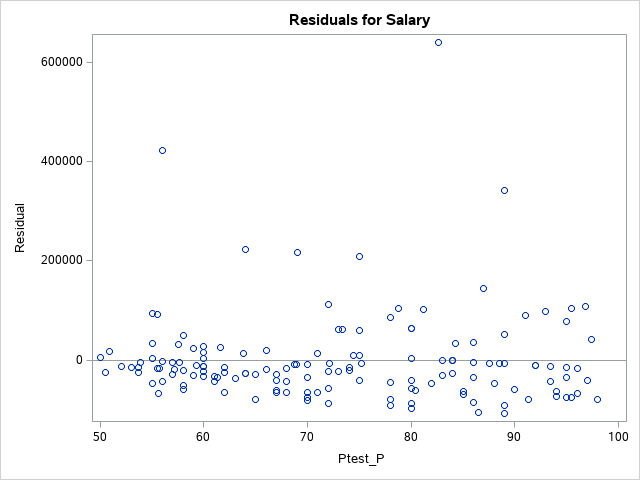
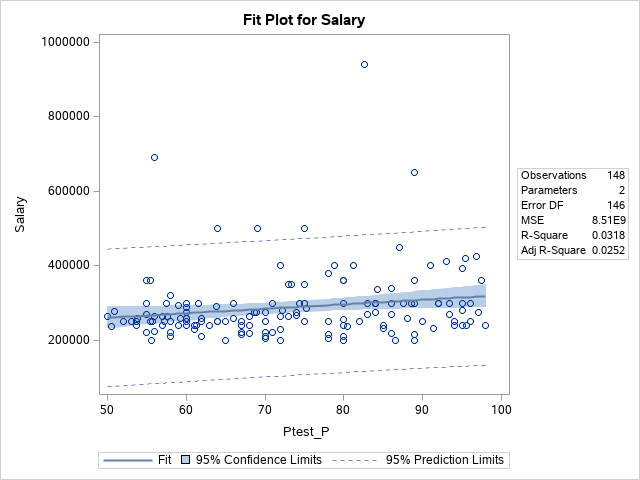
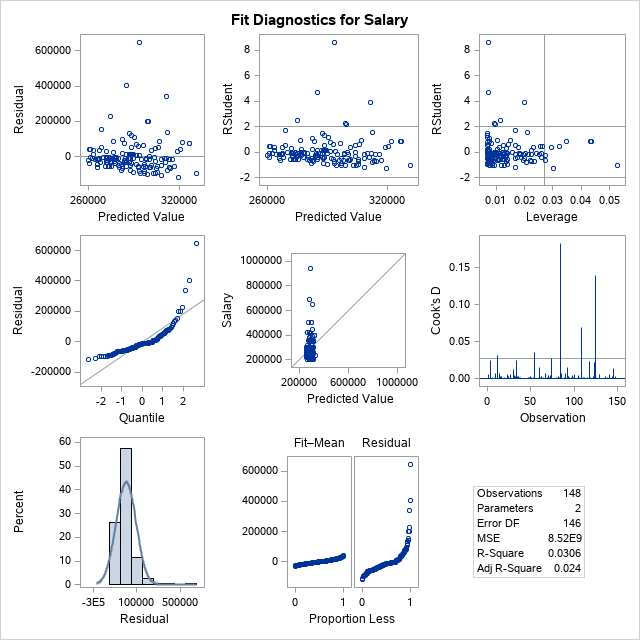
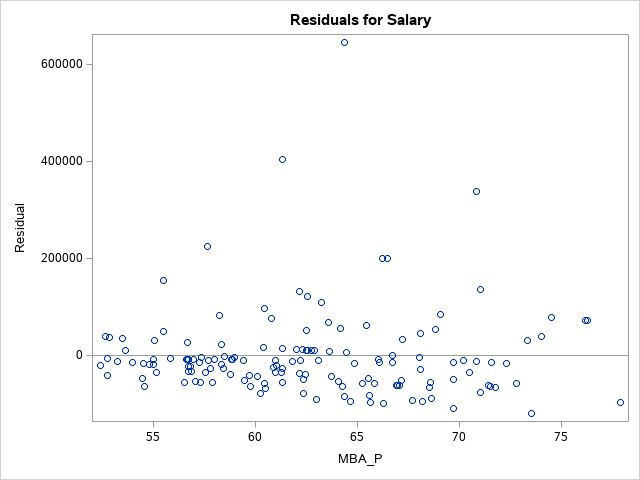
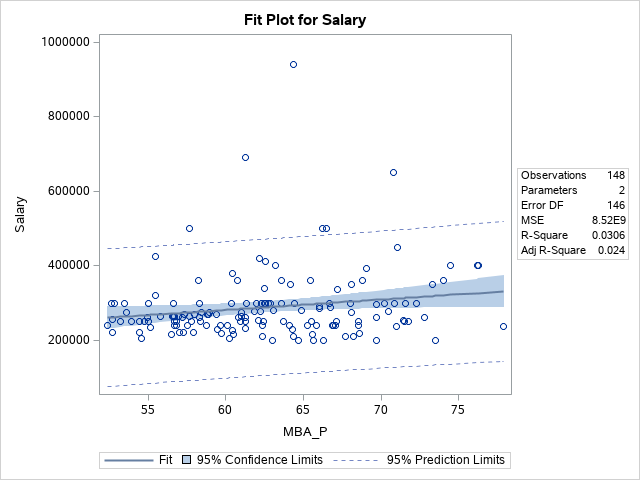
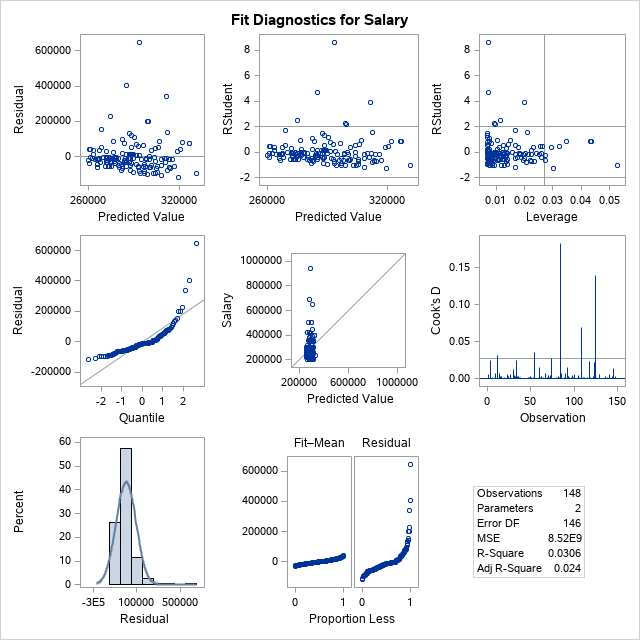
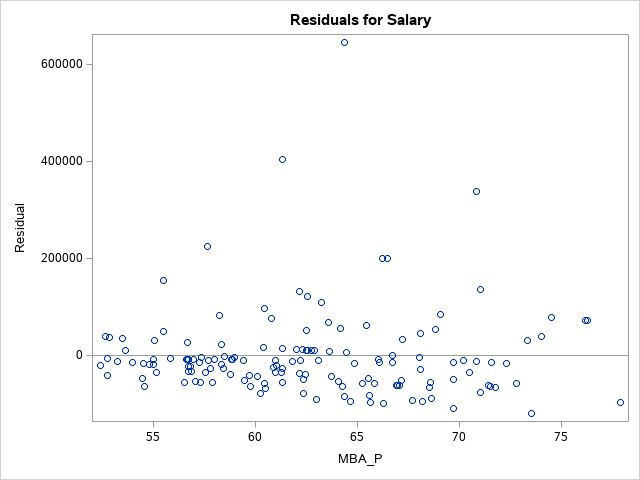
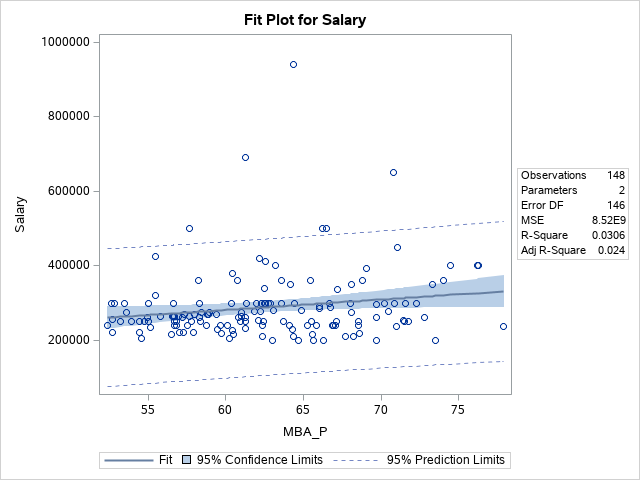

In [2]:
/* Performing simple linear regression model */
/* using each continuous variables as predictor and salary as response */
/* Part A */

%let categorical=ssc_p hsc_p degree_p ptest_p mba_p;

%macro simple(response=, predictor=);

%let i = 1;
%do %while(%scan(&predictor,&i,%str( )) ^= %str( ));

	%let var = %scan(&predictor,&i,%str( ));
	
	proc reg data=df;
		where &response ne 0;
		model &response = &var;
		title "Simple Regression with &var as Regressor";
	
	%let i = %eval(&i + 1);
%end;

run;
title;

%mend simple;
%simple(response=salary, predictor=&categorical);


/* Performing simple linear regression model*/
/* using mba_p as predictor and salary as response */
/* Part B */

ods graphics;

proc reg data=df;
	where salary ne 0;
	model salary=mba_p;
	title "Simple Regression with MBA_P as Regressor";
run;
quit;
title;